# 1. Perkenalan

Nama : Gentur Herlambang

Batch : FTDS-017-RMT

Dataset : Data churn rate

Objective : Menganalisa faktor-faktor apa saja yang mempengaruhi churn rate perusahaan dan membuat strategi baik untuk jangka pendek maupun jangaka panjang sehingga kita siap dan bisa unutuk meminimalisir atau mengurangu churn rate yang terjadi di perusahaan , dan memebnuat model yang dapat memprediksi apakah seorang costumer akan churn dengan menggunakan ANN baik dengan Sequintional maupun Functional API.

# 2. Import Libraries

Berikut ini adalah Libraries yang di gunakan

In [1]:
## Import libararies untuk data Loading dan EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Import libararies Preprocessing
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  OrdinalEncoder ,LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer



## Import libararies Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from sklearn.metrics import classification_report

## Import libararies Model Inference
import pickle
import json

# 3. Data Loading

pada bagian akan menload data dari CSV ke dalam dataframe

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'K:\Hack8 Data Science\Phase 2\Milestone\Milestone 1\churn.csv') ##Menload data 
df

FileNotFoundError: [Errno 2] No such file or directory: 'K:\\Hack8 Data Science\\Phase 2\\Milestone\\Milestone 1\\churn.csv'

# 4.EDA

Pada bagian ini akan melakukan Eksplorasi data yang di harapkan mendapatkan insight  

Pertma sebelum mulai eksplorasi copy data agar data asle aman

In [ ]:
eda=df.copy()# copy data unutk ekplorasi

Pertma kita akan melihat keadaan chun rate kita pada saat ini

Text(0.5, 1.0, 'Churn Rate')

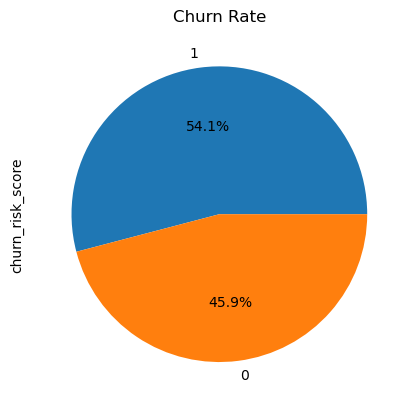

In [ ]:
eda['churn_risk_score'].value_counts().plot.pie(autopct='%1.1f%%') # check chun rate
plt.title('Churn Rate')

Pada saat ini pengguna kita memiliki resiko chun yang sangat tinggi yaitu 54% persen , sedangkan bedasarkan data dari statista (https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/) nilai churn rate rata-rata dari online retail adalah 22%. Maka dari itu di butuhkan persiapan strategi baik unutk jangka panjang maupun pendek .

Kemudian akan melihat persebaran gender pengguna dan churn rate berdasarkan gender.

Text(0.5, 1.0, 'Gender Churn Rate')

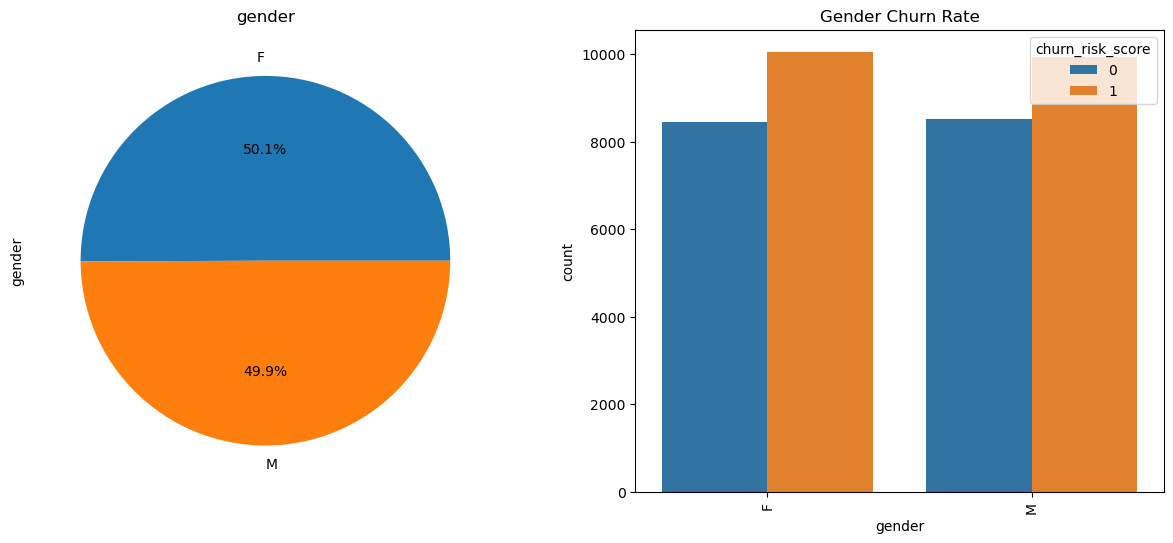

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
eda['gender'].value_counts().plot.pie(autopct='%1.1f%%') # persebaran gender
plt.title('gender')
plt.subplot(1,2,2)
sns.countplot(data=eda,x='gender',hue=eda['churn_risk_score']) # melihat persebaran churn rate berdasarkan gender
plt.xticks(rotation=90)
plt.title('Gender Churn Rate')

Terlihat persebaran anatara Pria dan wanita cukup merata dan juga persebaraan churn rate nya.

Kemudian akan melihat persebaran churn rate berdasakan tingkat membership.

Text(0.5, 1.0, 'Memeber Churn Rate')

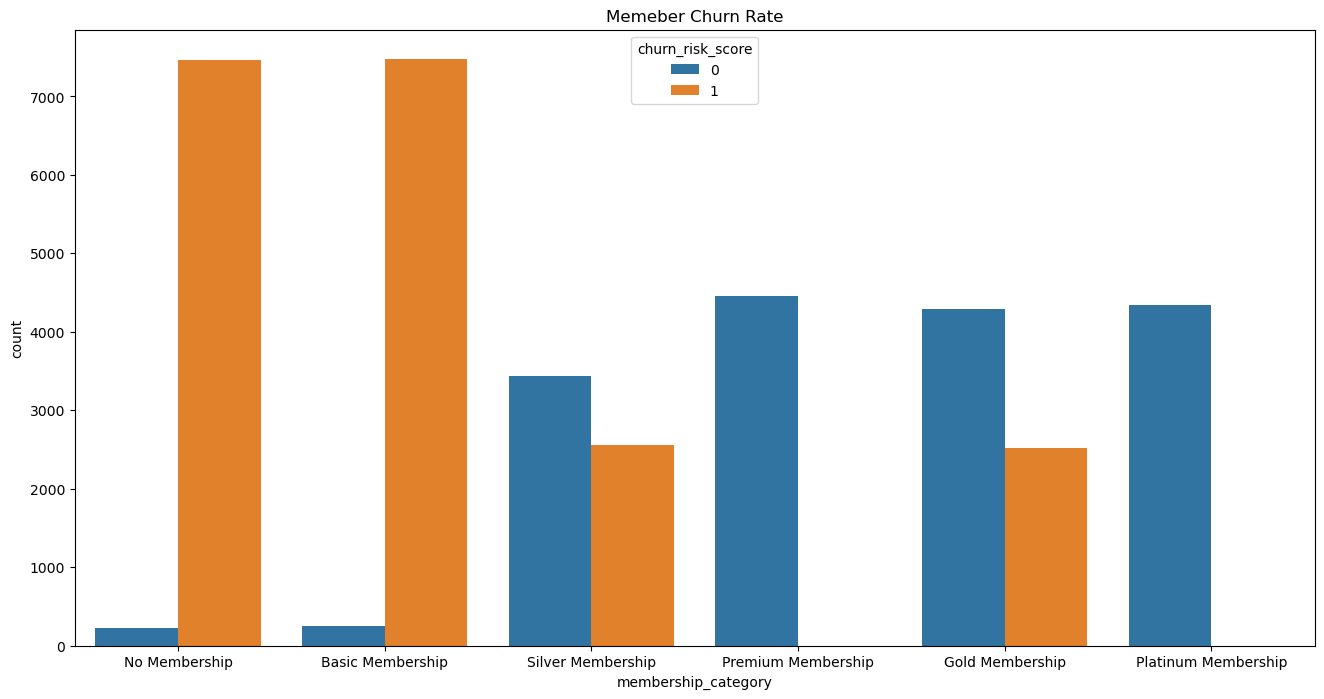

In [ ]:
# melihat persebaran membership dan churn rate
plt.figure(figsize=(16,8))
sns.countplot(data=eda,x='membership_category',hue=eda['churn_risk_score']) 
plt.title('Memeber Churn Rate')

Dapat terlihat ada hubungan antara tingkat membership dan rate dari churnnya, dengan meinigkattnya tingkat membership maka rate of churn nya ikut menurun.

Karena tingkat memebership berpengaruh terhadap churn rate maka akan melihat bagaimana rata rata dari nilai transaksi dan poin dari masing-masing tingkat membership.

Text(0.5, 1.0, 'Points')

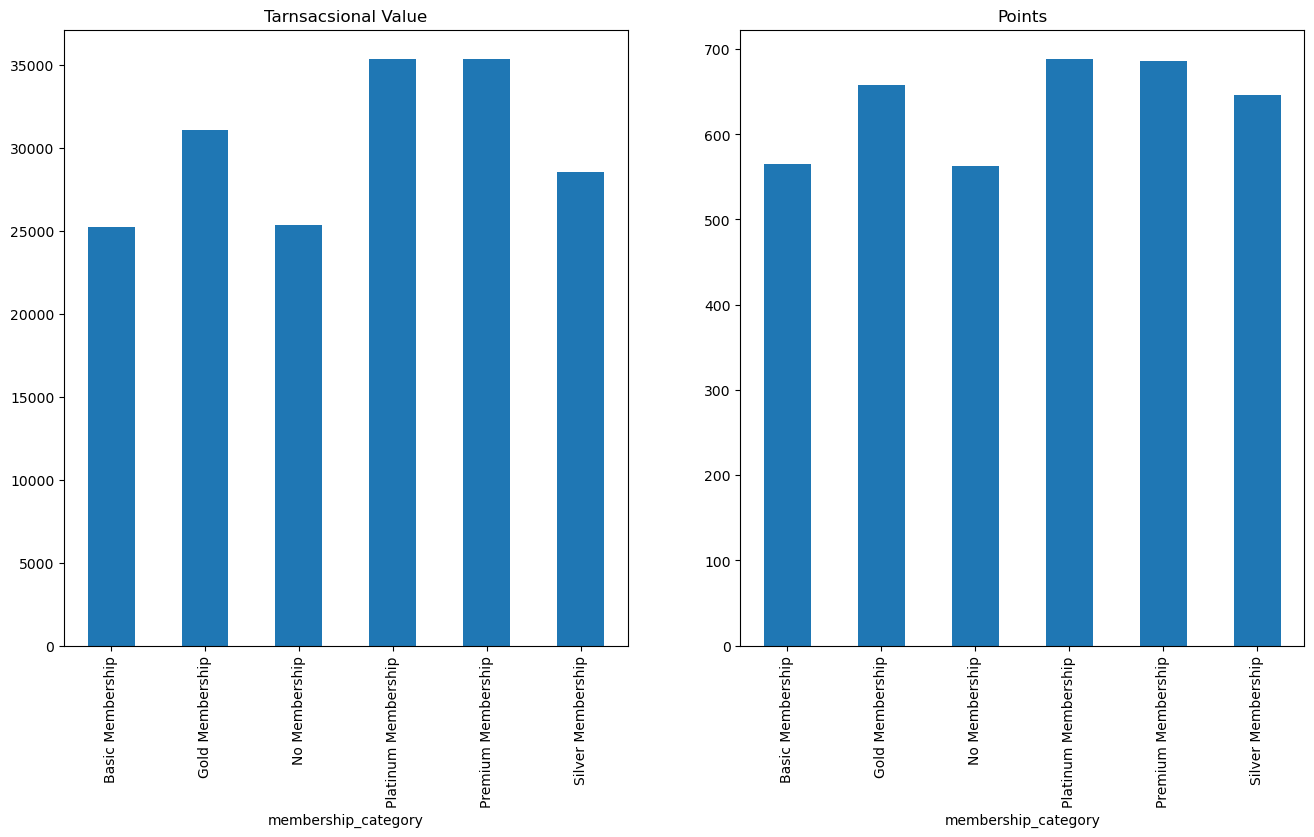

In [ ]:
## melihat nilai rata-rata dari masing-masing tingkat memebership.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
eda.groupby("membership_category")["avg_transaction_value"].mean().plot(kind='bar')
plt.title('Tarnsacsional Value')
plt.subplot(1,2,2)
eda.groupby("membership_category")["points_in_wallet"].mean().plot(kind='bar')
plt.title('Points')

Over all tidaka ada perbedaan yang signikian dari masing-masing tingkat membership unutk nilai rata-rta dari setiap transaksi maupun nilai poin yang dimiliki.

kemudian akan melihat tingkat komplain dan persebaran komplain dengan churn rate nya.

Text(0.5, 1.0, 'Complaint Churn Rate')

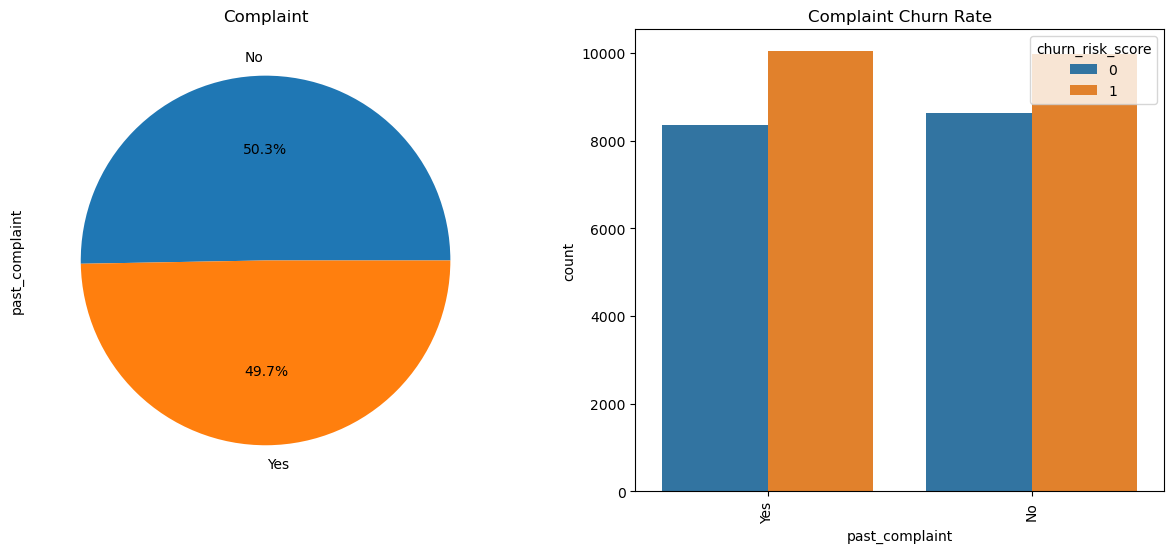

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
eda['past_complaint'].value_counts().plot.pie(autopct='%1.1f%%') # melihat komplain pengguna
plt.title('Complaint')
plt.subplot(1,2,2)
sns.countplot(data=eda,x='past_complaint',hue=eda['churn_risk_score']) # melihat persebaran komplain dengan churn rate
plt.xticks(rotation=90)
plt.title('Complaint Churn Rate')

Pertama dengan tingkat komplain sebanyak hampir 50 % dapat dikatan tidak baik , karena berdasarkan data dari mckinsey (https://www.mckinsey.de/~/media/McKinsey/Business%20Functions/Operations/Our%20Insights/Complaint%20and%20failure%20management%20Key%20insights%20from%20a%20cross%20industry%20study/Complaint-and-failure-management-Key-insights-from-a-cross-industry-study.pdf) maximal complain rate adalah sekiatar 20% .

Karena complaint score yang buruk maka kita akan memfollow upnya dnegan melihat respon kita terhadap komplain yang di layangkan ke kita.

Text(0.5, 1.0, 'occuputation income')

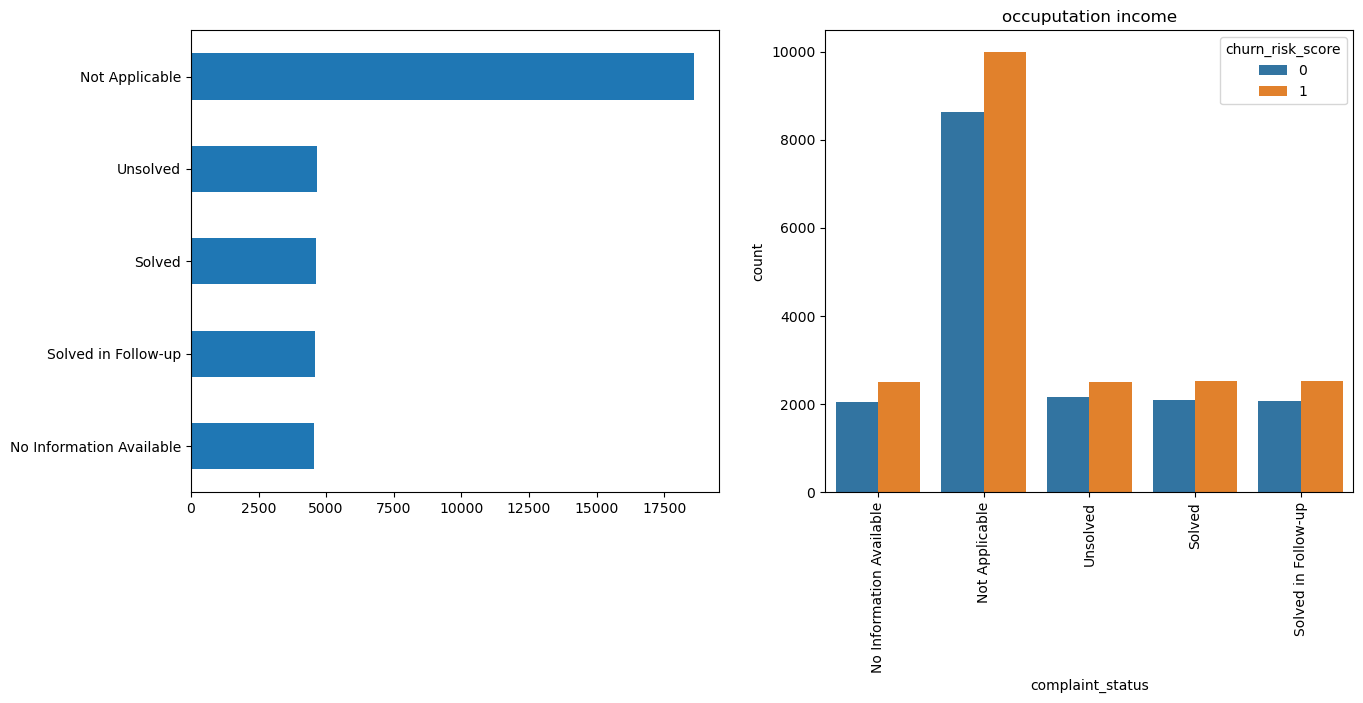

In [ ]:
## complain status
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
eda['complaint_status'].value_counts(ascending=True).plot(kind='barh') 
plt.subplot(1,2,2)
sns.countplot(data=eda,x='complaint_status',hue=eda['churn_risk_score']) 
plt.xticks(rotation=90)
plt.title('occuputation income')


Terlihat saat ini kita masih belum bisa memperbaikik komplain yang di layangkan kepda kita , dan hanya sebagaian kecil komoplain saja yang bisa kita selesikan ,

Selanjutnya akan melihat feedback yang di berikan kepada kita dari pengguna.

<AxesSubplot:>

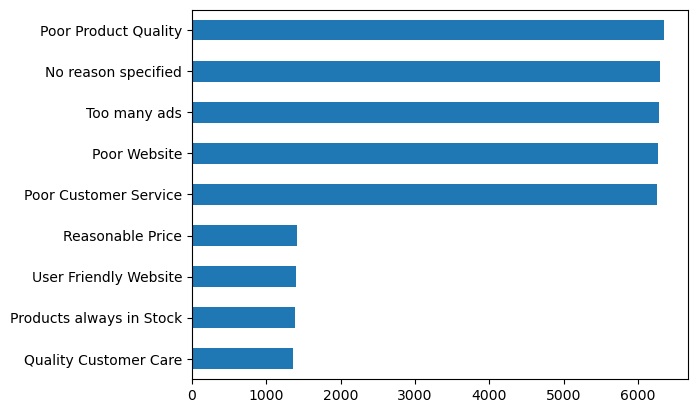

In [ ]:
eda['feedback'].value_counts(ascending=True).plot(kind='barh') # Feedback

Terdapat 3 problem utama yang di berikan kedapda kita dalah : barang yang kurang bagus , website yang masih belum optimal ,dan terakhir costumer service yang buruk.

Untuk menjawab salah satu problem di atas untuk jangka pendeknya kita bisa memberi solusi dengan meningkatkan kualitas website untuk minengkatan experiance pengguna , maka dari itu akan melihat jenis media apa yang di gunakan unutk mengakses website kita.

Text(0.5, 1.0, 'Medium Churn Rate')

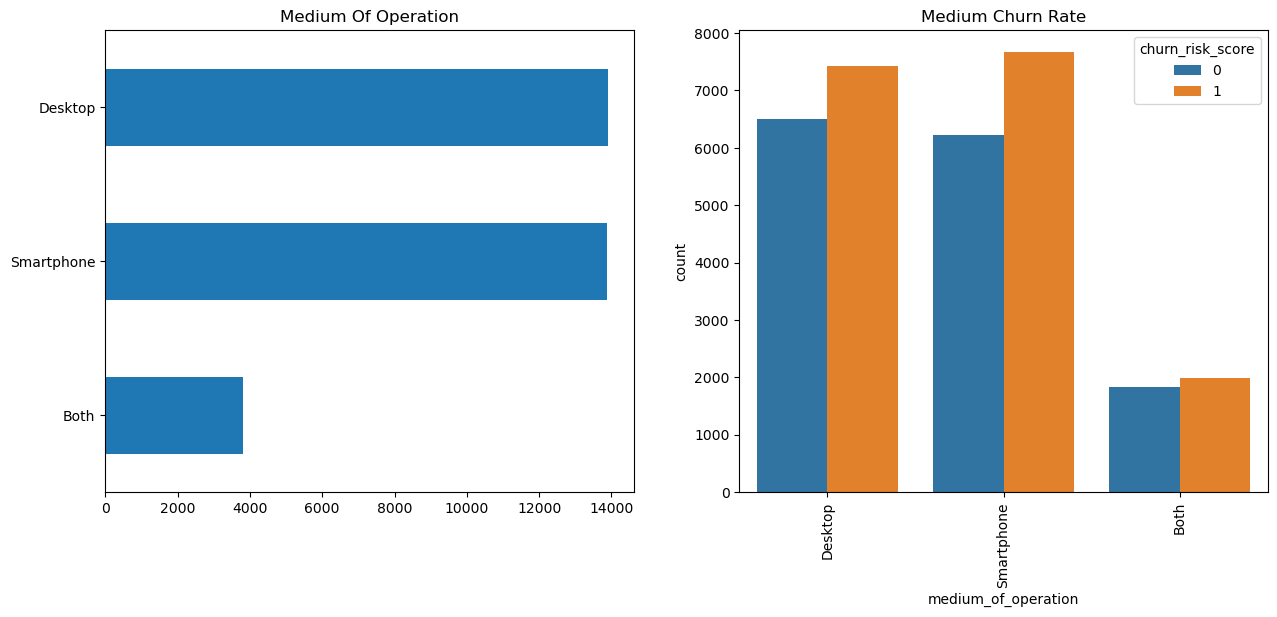

In [ ]:
 # melihat persebaran Media yang di gunakan 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
eda['medium_of_operation'].value_counts(ascending=True).plot(kind='barh')
plt.title('Medium Of Operation')
plt.subplot(1,2,2)
sns.countplot(data=eda,x='medium_of_operation',hue=eda['churn_risk_score']) 
plt.xticks(rotation=90)
plt.title('Medium Churn Rate')

ternaya Persebaran anatara pengguna desktop dan smartphone sama jadi kita harus meningkatkan experiance di kedua media tersebut.

# 5.Data Preprocessing

pada bagian ini kana mempersiapakan data sebelum di masukan ke model

pertama mencopy data sebelum di proses

In [ ]:
# membuat copy unutk di proces
data=df.copy()
data.drop(['user_id', 'joining_date','last_visit_time'], axis=1, inplace=True) # mendrop fitur yang di rasa tidak relevan
pd.set_option('display.max_columns',None)

Mencheck misiing value

In [ ]:
data.isnull().sum() # check missing value

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Mengisi mising value dengan value sebelumnya

In [ ]:
#Mengisi mising value dengan value sebelumnya
data[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']]= data[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']].fillna(method='pad')

Menchek apakah masi ada yang missing

In [ ]:
data.isnull().sum() # check misising value

age                             0
gender                          0
region_category                 2
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             1
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

ternyata masih ada , akan di isi dengan value di depannya

In [ ]:
# mengisi missing value dengan di depannya
data[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']]= data[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']].fillna(method='bfill')

Mencheck missing value

In [ ]:
data.isnull().sum() # check misiing value

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

sudah tidak ada data yang kosong

membagi train test dan validation

In [ ]:
# membagi train test dan validation
X_train, X_test = train_test_split(data, test_size=0.2,random_state=36)
X_train, X_val = train_test_split(X_train, test_size=0.2,random_state=36)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23686, 19)
Val Size :  (5922, 19)
Test Size :  (7402, 19)


cek korelasi dengan target 

<AxesSubplot:>

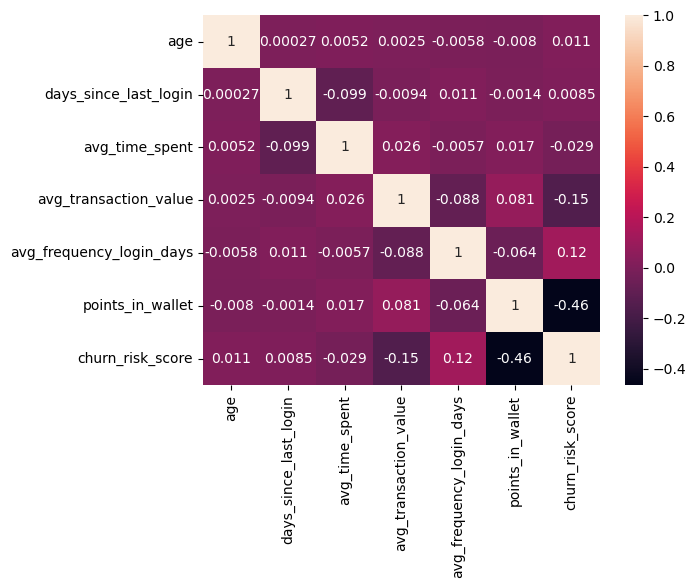

In [ ]:
#cek korelasi dengan target 
sns.heatmap(X_train.corr(method='spearman'),annot=True)

days since  loginm dan age akan di drop karena nilai korelasinya rendah

In [ ]:
# pendefinian target
y_train=X_train['churn_risk_score']
y_val=X_val['churn_risk_score']
y_test=X_test['churn_risk_score']

# drop fitur yang tidak relevan
X_train = X_train.drop(['age','days_since_last_login','churn_risk_score'], axis=1)
X_val = X_val.drop(['age','days_since_last_login','churn_risk_score'], axis=1)
X_test = X_test.drop(['age','days_since_last_login','churn_risk_score'], axis=1)

kemudian melihat normalitas nya

In [ ]:
def central_plot(df,variable): ## membuat variabel central tendency
    print(variable) 
    print ("median:",df[variable].median())
    print ("mean:",df [variable].mean())
    print ("mode:",df [variable].mode()[0])
    print ("skew:",df [variable].skew())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('central tendencies')

Cek avg time spent

avg_time_spent
median: 162.64
mean: 281.05514196959865
mode: 0.0
skew: 2.254920355464151


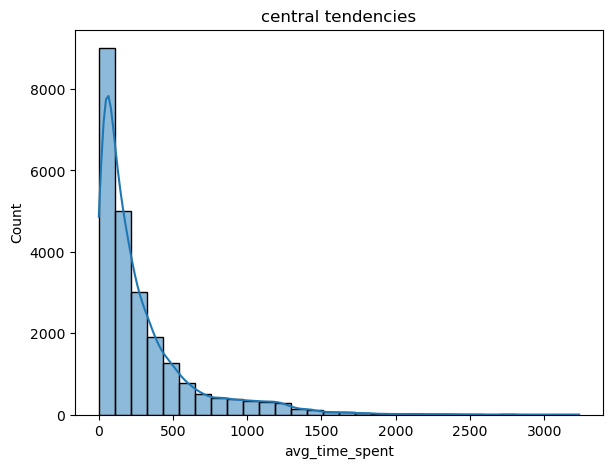

In [ ]:
# Cek avg time spent
central_plot(X_train, 'avg_time_spent')


 skew di 2.25, selanjutnya cek harga trasaksi rata-rata

avg_transaction_value
median: 27632.065000000002
mean: 29289.99115933451
mode: 1603.36
skew: 1.0149179094280916


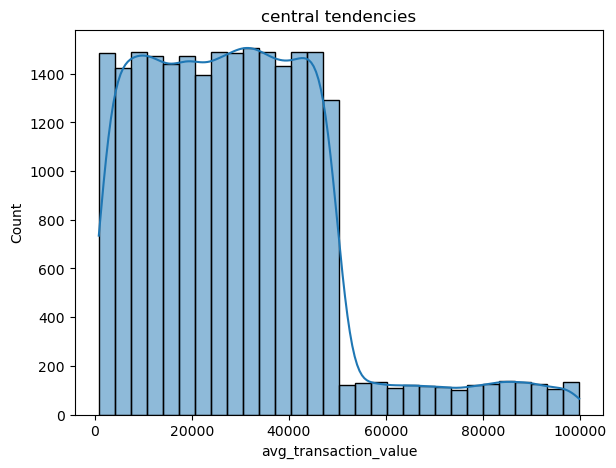

In [ ]:
# cek harga transasksi rata-rata
central_plot(X_train, 'avg_transaction_value')

agak skew di 1 , kemudian cek avg freq log

avg_frequency_login_days
median: 14.0
mean: 14.673950955691634
mode: 0.0
skew: 0.37789814731237203


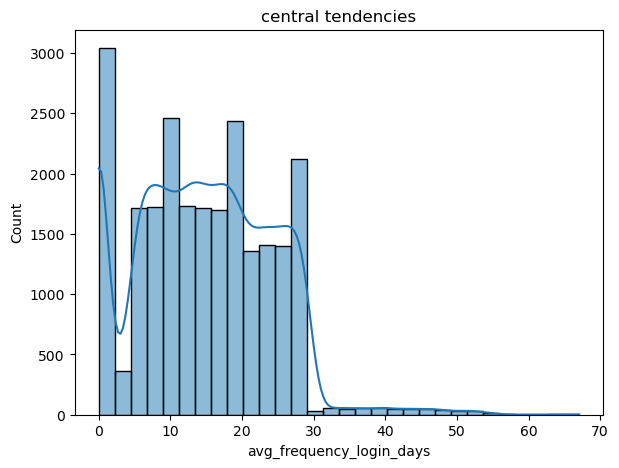

In [ ]:
# cek avg_frequency_login_days
central_plot(X_train, 'avg_frequency_login_days')

bisa di bilang normal di 0.3, dan terkahir cek point 

points_in_wallet
median: 680.48
mean: 625.1540606157417
mode: 0.0
skew: -0.7604291767473005


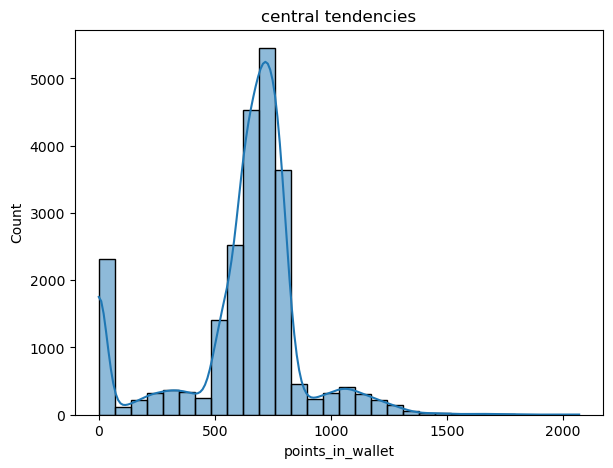

In [ ]:
# check point
central_plot(X_train, 'points_in_wallet')

agak skew di -0.7 , selanjutnya akan di normalisasi dengan capping dan di skale menguunakan minmax scaller karena range angka yang cukup besar.

In [ ]:
# mengahandle outlier , scale , dan encoding
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5) 
scaler=MinMaxScaler()
encode=OrdinalEncoder()


Pembentukan pipeleine dan pendifinisan jenis data

In [ ]:
# membentuk pipieline
num_pipe=make_pipeline(windsoriser,scaler)
cat_pipe=make_pipeline(encode)


# pendefinisan jenis data
num_columns = X_train.select_dtypes(include=np.number).columns.tolist() #Membagi kolom numeric dan categorical
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat Columns :  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


pembentukan pipeline

In [ ]:
# rancangan pipeline final
final_pipeline =ColumnTransformer( [
    ('pipe_num', num_pipe, num_columns),
    ('pipe_cat', cat_pipe, cat_columns)
])
final_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('pipe_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'region_category',
                                  'membership_category',
                           

fit dan transform ke masing-masing dataset

In [ ]:
## fit dan transform ke masing-masing dataset
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape


(23686, 16)

# 6.Model Defination - BASE

Pada bagian ini akan melkakaun pendefian model ANN , model yang di gunakan terbagi 2 jenis yaitu Sequential APi dan Functional API

## Sequintional API

Model Sequentional APi ini cara membuatnya lebih mudah tetapi bentuk modelnya sederhana

In [ ]:
## reset model agar hasil konsisten
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential API


model_sequential = Sequential()
model_sequential.add(Dense(18, activation='relu', input_shape=(16,))) # Hidden Layer 1
model_sequential.add(Dense(12, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(6, activation='relu')) # Hidden Layer 3
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                306       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 619
Trainable params: 619
Non-trainable params: 0
_________________________________________________________________


## Functional API

Sedangkan unutk Funtional API cara membuatnya lebih komplek , tetapi bentuk modelnya bisa jauh lebih komplek juga

In [ ]:
## reset model agar hasil konsisten
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Functional Model


input_layer = Input(shape=(16,))
hidden_layer1 = Dense(12, activation='relu')(input_layer)
hidden_layer2 = Dense(6, activation='relu')(hidden_layer1)
concat_layer = concatenate([input_layer, hidden_layer2])
hidden_layer3 = Dense(18, activation='relu')(concat_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer3)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 12)           204         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 6)            78          ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

# 7.Model Training - Base

Pada bagian ini akan mentarin model yang sudah di bangun pada bagian sebelumnya

## Sequintional API

Pada model ini akan menggunakan epoch sebanyak 30 dan masing-masing batch berukuran 30

In [ ]:
# epoch sebanyak 30 dan dan batch sebanayak 30
history_seq_base = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=30)

Epoch 1/30
790/790 [==============================] - 3s 3ms/step - loss: 0.5818 - accuracy: 0.7089 - val_loss: 0.5449 - val_accuracy: 0.7376
Epoch 2/30
790/790 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.7364 - val_loss: 0.5301 - val_accuracy: 0.7349
Epoch 3/30
790/790 [==============================] - 2s 2ms/step - loss: 0.5321 - accuracy: 0.7450 - val_loss: 0.5184 - val_accuracy: 0.7538
Epoch 4/30
790/790 [==============================] - 2s 2ms/step - loss: 0.5235 - accuracy: 0.7542 - val_loss: 0.5115 - val_accuracy: 0.7643
Epoch 5/30
790/790 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.7604 - val_loss: 0.5051 - val_accuracy: 0.7665
Epoch 6/30
790/790 [==============================] - 2s 2ms/step - loss: 0.5111 - accuracy: 0.7657 - val_loss: 0.4987 - val_accuracy: 0.7744
Epoch 7/30
790/790 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7666 - val_loss: 0.4918 - val_accuracy: 0.7795
Epoch 

Rata-rata untuk tiap epcoh di butuhkan waktu1-2 detik

## Functional API

Berbeda dengan Sequntial API di sini meskipun menggunakan 30 epoch , tetapi tiap batch di bagi menjai 10

In [ ]:
# epoch 30 batch 10
history_func_base = model_functional.fit(X_train,
                                    y_train,
                                    epochs=30,
                                    validation_data=(X_val, y_val),
                                    batch_size=10)

Epoch 1/30
2369/2369 [==============================] - 5s 2ms/step - loss: 0.5704 - accuracy: 0.7085 - val_loss: 0.5362 - val_accuracy: 0.7376
Epoch 2/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.5332 - accuracy: 0.7388 - val_loss: 0.5165 - val_accuracy: 0.7467
Epoch 3/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.5161 - accuracy: 0.7503 - val_loss: 0.5015 - val_accuracy: 0.7573
Epoch 4/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.5067 - accuracy: 0.7564 - val_loss: 0.4996 - val_accuracy: 0.7511
Epoch 5/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.7617 - val_loss: 0.4909 - val_accuracy: 0.7709
Epoch 6/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.4943 - accuracy: 0.7638 - val_loss: 0.4861 - val_accuracy: 0.7749
Epoch 7/30
2369/2369 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.7680 - val_loss: 0.4793 - val_accuracy:

Unutk model Funtional api tiap epoch nya membutuhkan waktu sekitar 4-5 detik 

# 8.Model Evaluation 

Pada bagian ini akan mengevaluasi model dengan metriks parameter akurasi.

## Sequential API

Pertama akan mengevaluasi model Sequential API 

In [ ]:
# Evaluasi Sequential API
history_seq_df = pd.DataFrame(history_seq_base.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.581778,0.708942,0.544907,0.737589
1,0.544171,0.736427,0.530112,0.734887
2,0.532092,0.744997,0.518404,0.753799
3,0.523543,0.754159,0.511461,0.764269
4,0.516946,0.760365,0.505132,0.766464
5,0.511059,0.765684,0.498665,0.774401
6,0.504922,0.766571,0.491766,0.779466
7,0.498915,0.769484,0.488105,0.783350
8,0.489804,0.778772,0.473841,0.791287
9,0.475971,0.788989,0.456632,0.801756


Hasil akurasi akhirnya ada di sekitar 85%

In [ ]:
# mencheck calssification report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3421
           1       0.85      0.90      0.87      3981

    accuracy                           0.86      7402
   macro avg       0.86      0.86      0.86      7402
weighted avg       0.86      0.86      0.86      7402



Selain akurasi yg baik di sekitar 86% nilai recall nya juga cukup baik di 86% menendakan modelnya dapat dengan baik memprediksi false negatifnya sehingga dapat merespon churn risk costumer dengan baik

<AxesSubplot:>

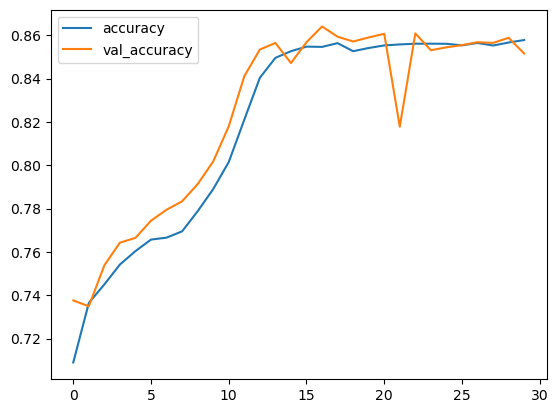

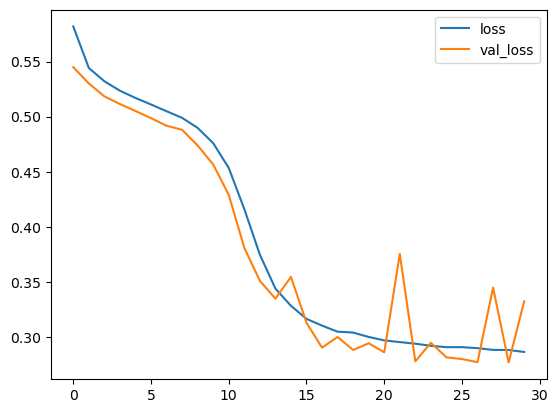

In [ ]:
# melihat performa model dengan validasinya.
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

model base Sequential ini dapat dikatakan memiliki peforma yang baik karena nilai test dan validasinya cukup konsisten meskipoun terlihat seperti explosion tetapi masih dalam batas yang wajar untuk dapat di katakan konsisten , dan mulai terjadi convergance dia sekitan epoch ke 12-13

## Functional API

In [ ]:
# evaluasi Funtional API
history_func_df = pd.DataFrame(history_func_base.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.570404,0.708478,0.536153,0.737589
1,0.533215,0.738833,0.516472,0.746707
2,0.516145,0.750274,0.501494,0.757345
3,0.506668,0.756354,0.499592,0.751098
4,0.499473,0.761674,0.490895,0.770854
5,0.494288,0.763827,0.486147,0.774907
6,0.489429,0.768006,0.479341,0.774401
7,0.486143,0.770624,0.479396,0.780986
8,0.479909,0.780757,0.465493,0.794495
9,0.464327,0.793085,0.440252,0.809355


Memiliki akurasi akhir di skeitar 86%

In [ ]:
# melihat Clasification score 

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 0s 993us/step
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      3421
           1       0.96      0.75      0.84      3981

    accuracy                           0.85      7402
   macro avg       0.86      0.86      0.85      7402
weighted avg       0.87      0.85      0.85      7402



Selain akurasi yg baik di sekitar 85% nilai recall nya juga cukup baik di 86% menendakan modelnya dapat dengan baik memprediksi false negatifnya sehingga dapat merespon churn risk costumer dengan baik

<AxesSubplot:>

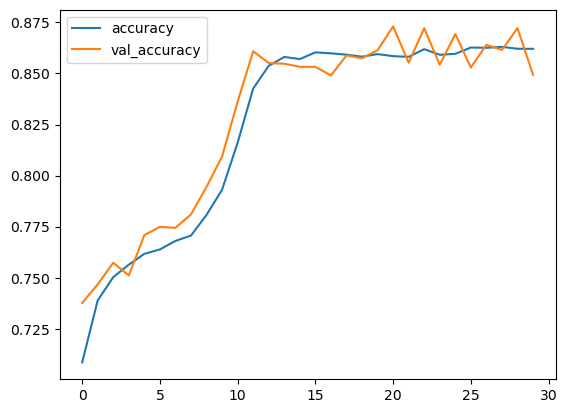

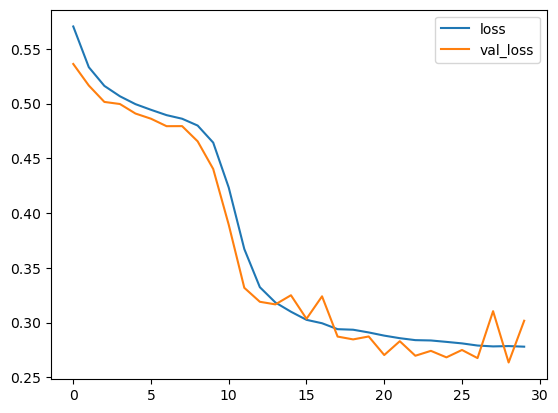

In [ ]:
# melihat performa model dengan validasinya.
history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

model base Functional ini dapat dikatakan memiliki peforma yang baik karena nilai test dan validasinya cukup konsisten , dan mulai terjadi convergance dia sekitan epoch ke 12-13

# 9.Model Improvement

Setlah membuat 2 model akan di lakukan improvisasi , dengan menggunakan pipeline khusus unutk tensor

In [ ]:
# Pendefinisan pipeline tensor
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(30).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(30)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(30)

## Sequential API

Model pertama yang di impovisasi adalah Sequntial API

In [ ]:
## reset model agar hasil konsisten
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Menggunakan optimasasi yang lebih modern yaitu adam

In [ ]:
## Menggunakan optimasasi yang lebih modern yaitu adam
model_sequential = Sequential()
model_sequential.add(Dense(18, activation='relu', input_shape=(16,))) # Hidden Layer 1
model_sequential.add(Dense(12, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(6, activation='relu')) # Hidden Layer 3
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [ ]:
## training model improvisasi
history_seq_imp = model_sequential.fit(train_pipe, epochs=30,validation_data=val_pipe)

Epoch 1/30
790/790 [==============================] - 3s 2ms/step - loss: 0.5792 - accuracy: 0.7021 - val_loss: 0.5186 - val_accuracy: 0.7572
Epoch 2/30
790/790 [==============================] - 1s 2ms/step - loss: 0.5096 - accuracy: 0.7618 - val_loss: 0.4851 - val_accuracy: 0.7801
Epoch 3/30
790/790 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.7894 - val_loss: 0.4240 - val_accuracy: 0.8122
Epoch 4/30
790/790 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8283 - val_loss: 0.3480 - val_accuracy: 0.8511
Epoch 5/30
790/790 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8524 - val_loss: 0.3088 - val_accuracy: 0.8548
Epoch 6/30
790/790 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.3009 - val_accuracy: 0.8602
Epoch 7/30
790/790 [==============================] - 2s 2ms/step - loss: 0.2950 - accuracy: 0.8581 - val_loss: 0.2830 - val_accuracy: 0.8598
Epoch 

Peningkatan akurasi akhir menjadi 89%

In [ ]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3421
           1       0.85      0.90      0.87      3981

    accuracy                           0.86      7402
   macro avg       0.86      0.86      0.86      7402
weighted avg       0.86      0.86      0.86      7402



Selain akurasi yg meningkat menjadi  sekitar 87% nilai recall nya juga meningkat dari model base nya di 87% menendakan modelnya dapat dengan baik memprediksi false negatifnya sehingga dapat merespon churn risk costumer dengan baik

<AxesSubplot:>

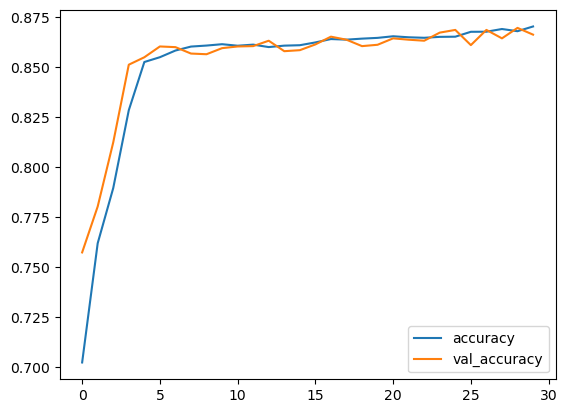

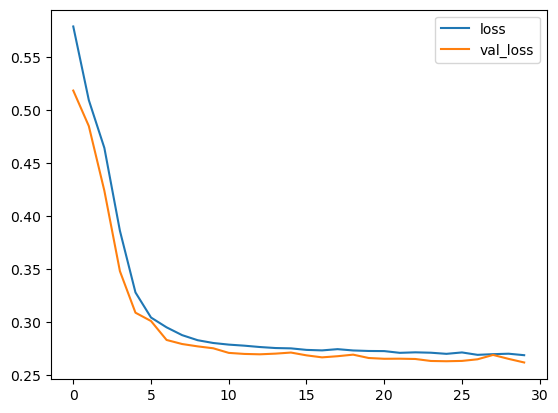

In [ ]:
# melihat performa model dengan validasinya.
history_seq_df = pd.DataFrame(history_seq_imp.history)
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

peningkatakan terjadi pada convergance ratenya bila diabandingkan dengan base modelnya , di base model terjadi pada epoch ke 12-13 di sini mulai terjadi pada epoch ke 6-7

## Functional API

Selanjutnya mengimprovisasi Model Functional API 

In [ ]:
## reset model agar hasil konsisten
seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Menggunakan optimizer yang modern yaitu adam

In [ ]:
# Menggunakan optimizer yang modern yaitu adam
input_layer = Input(shape=(16,))
hidden_layer1 = Dense(12, activation='relu')(input_layer)
hidden_layer2 = Dense(6, activation='relu')(hidden_layer1)
concat_layer = concatenate([input_layer, hidden_layer2])
hidden_layer3 = Dense(18, activation='relu')(concat_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer3)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 12)           204         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 6)            78          ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

melakukan trainng 

In [ ]:
## training
history_func_imp = model_functional.fit(train_pipe,
                                    epochs=30,
                                    validation_data=val_pipe)

Epoch 1/30
790/790 [==============================] - 3s 2ms/step - loss: 0.5759 - accuracy: 0.7125 - val_loss: 0.5272 - val_accuracy: 0.7518
Epoch 2/30
790/790 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.7517 - val_loss: 0.5123 - val_accuracy: 0.7602
Epoch 3/30
790/790 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.7548 - val_loss: 0.4983 - val_accuracy: 0.7607
Epoch 4/30
790/790 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.7591 - val_loss: 0.4853 - val_accuracy: 0.7643
Epoch 5/30
790/790 [==============================] - 1s 2ms/step - loss: 0.4822 - accuracy: 0.7627 - val_loss: 0.4807 - val_accuracy: 0.7714
Epoch 6/30
790/790 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7754 - val_loss: 0.4397 - val_accuracy: 0.7974
Epoch 7/30
790/790 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8243 - val_loss: 0.3415 - val_accuracy: 0.8509
Epoch 

Peningkatan pada setiap epochnya menjadi 1-2 detik yang sebelumnya 4-5 detik

In [ ]:
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3421
           1       0.89      0.84      0.86      3981

    accuracy                           0.86      7402
   macro avg       0.86      0.86      0.86      7402
weighted avg       0.86      0.86      0.86      7402



Hasil akhir bisa dikatakan sama dengan model base nya tetapi peningkatan terjadi di kecepatan tiap epochnya.

<AxesSubplot:>

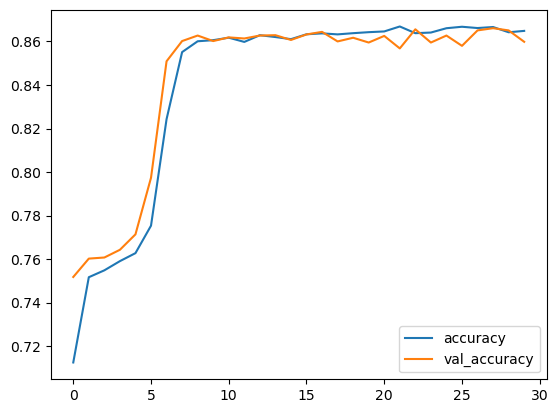

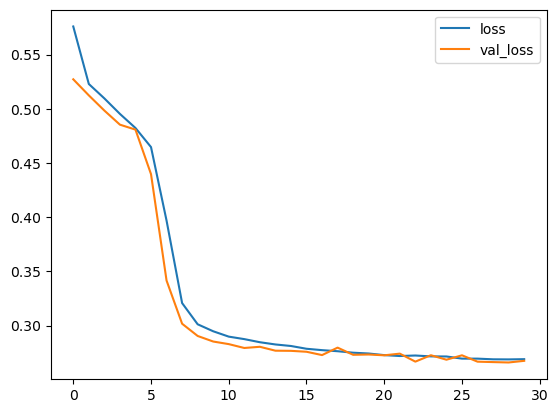

In [ ]:
# melihat performa model dengan validasinya.
history_seq_df = pd.DataFrame(history_func_imp.history)
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Sama seperti model Sequential titik convergance nya menajdi lebih cepat di sekitar 6-7 yang sebelumnya di 12-13

# 10.model saving

Model yang akan dipilih adalah Sequntial Improve

In [ ]:
#save pipeline
with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
#check model
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                306       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 619
Trainable params: 619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#freze model
model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                306       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 619
Trainable params: 0
Non-trainable params: 619
_________________________________________________________________


In [ ]:
#model saving
model_sequential.save('churn_model.h5')

# 11. Model Infarance

# 12. kesimpulan

Pertma untuk keadaan kita saat ini bisa dikatakan buruk karena churn rate yang sanagat tinggi di angka 54% sedangkan standart insdutri pada saat ini hanya berada di sekitar 22%. Sedangkan tingkat churn rate sangat berhubungan dengan tingkat membership, semakin tinggi membershipnya makan tingkat churnnya semakin rendah. Dan juga complain rate kita saat ini masih sangat tinggi yaitu sekitar 50% dan Sebagian besar complain saat ini masih belum bisa di selesaikan . Dan 3 feedback uatma kita saat ini adalah kualitas produk yang jelek , website yang masih belum optimal , dan costumer service yang buruk.  



Sedangkan untuk evaluasi Model :

Sequential API  
Untuk base model Sequential api memiliki performa yang cukup baik karena tiap epochnya hanya membutuhkan waktu 1-2 detik sedangkan performanya memiliki akurasi dan recall di sekitar 85% dan convergance terjadi di sekiatar opech ke 12-13, Sedangkan untuk improvisasinya terjadi di nilai akurasi yang meningkat menjadi 87% dan juga recall juga meningkat di 87% dan juga convergance mulai terjadi apada epoch ke 6-7.   



Functional API   
Unutk base modelnya bisa dikatakna ini jauh lebih berat di bandingkan Sequntial APi karena setiap epoch membutuhkan 4-6 detik dengan tingkat akurasi dan recall yang berada pada 86% dan convergance mulai terjadi pada epoch ke 12-13 , sedangkan unutk model imporvemntnya terjadi pada performa per epoch nya yang menjadi 1-2 detik yang sebelumnya 4-6 detik , meskipoun tingkat akurasi dan recall nya masih sama seperti sebelumnya, sama seperti model sebelumnya di dalam model imporvment ini convergance mulai terjadi pada epoch ke 6-7 yang sebelumnya di epoch 12-13.




Business Strategies:

Jangka Pendek:
- Memperbaiki kualitas website dang menguranggi jujmlah iklan yang di dalamnya agar experiance pengguna lebih baik  


Jangka Panjang:
- Melakukan Quality control yang baik agar kulitas produk meningkat
- melakukan pelatihan kepada costumer service unutk mencari solusi yang poengguna butuhkan 



